# 911 Calls Capstone Project

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')  #read csv file

In [3]:
df.info()  #check the info of the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()  #check the head of the file

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 zipcodes for 911 calls

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships for 911 calls

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Number of unique title codes are in the title column

In [7]:
df['title'].nunique()

110

Create a new column

In [8]:
def function(text):
    return text.split(':')[0]     #function to return the string split by :
    

In [9]:
df['Reason'] = df['title'].apply(function)   #creating a new column with the apply method

In [10]:
df['Reason'].value_counts()  #most common Reason for a 911 call

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

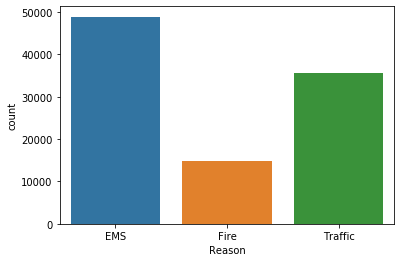

In [11]:
sns.countplot(df['Reason']) #plotting a count plot

In [12]:
type(df['timeStamp'][0])   #data type of the time stamp column

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])    #convert the string to DateTime objects

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}   #dictionary of numbers with days of the week as keys

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)   #mapping day of the week with dmap dictionary

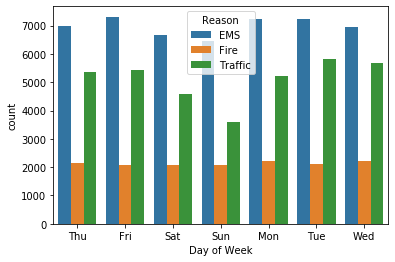

In [17]:
sns.countplot(df['Day of Week'],hue=df['Reason'])      #countplot 

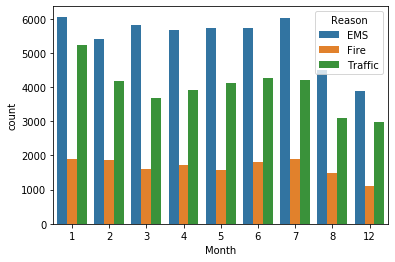

In [18]:
sns.countplot(df['Month'],hue=df['Reason'])  #countplot

In [47]:
bymonth = df.groupby('Month').count()   #using the groupby method to group by month

In [20]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


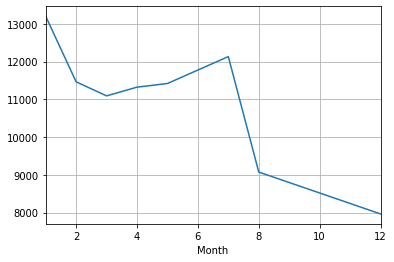

In [21]:
bymonth['twp'].plot(grid = True)

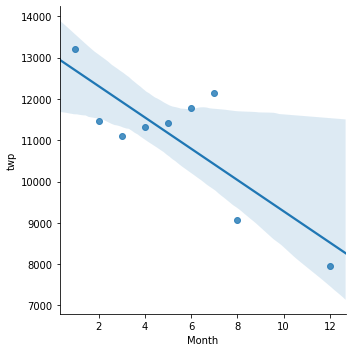

In [24]:
sns.lmplot(x = 'Month',y ='twp', data=bymonth.reset_index())   #linear regression plot

In [25]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())  #creating a new column titled date

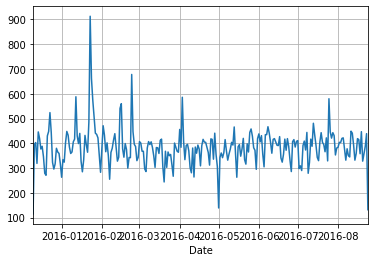

In [37]:
df.groupby('Date').count()['twp'].plot()      #plot of counts of 911 calls
plt.grid()

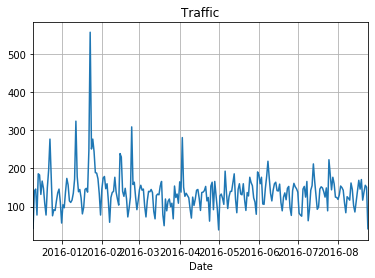

In [36]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()   #plot of traffic as a reason for 911 calls
plt.title('Traffic')
plt.grid()

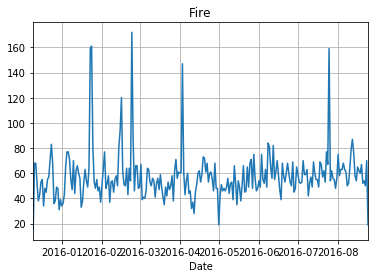

In [35]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()    #plot of fire as a reason for 911 calls
plt.title('Fire')
plt.grid()

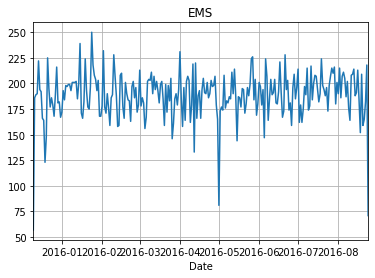

In [38]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()  #plot of EMS as a reason for 911 calls
plt.title('EMS')
plt.grid()

In [39]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


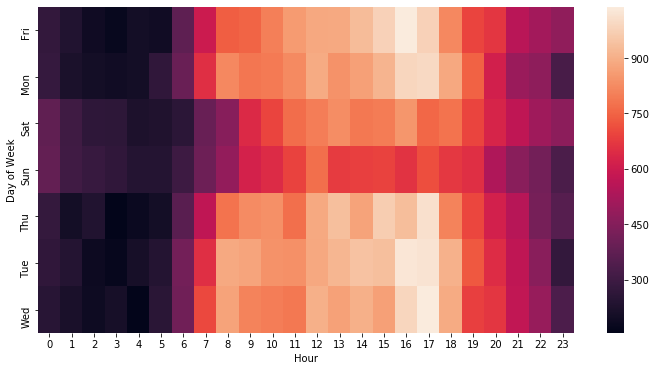

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)


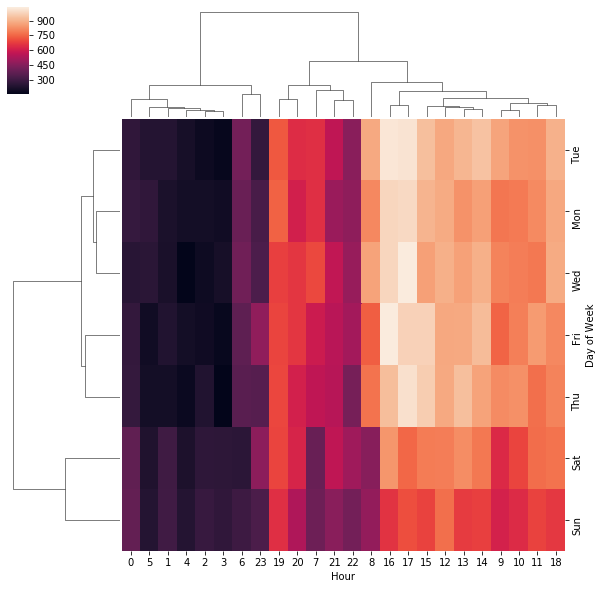

In [43]:
sns.clustermap(dayHour)

In [44]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


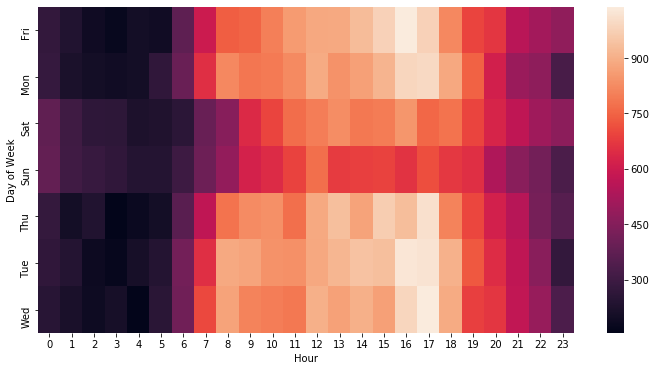

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

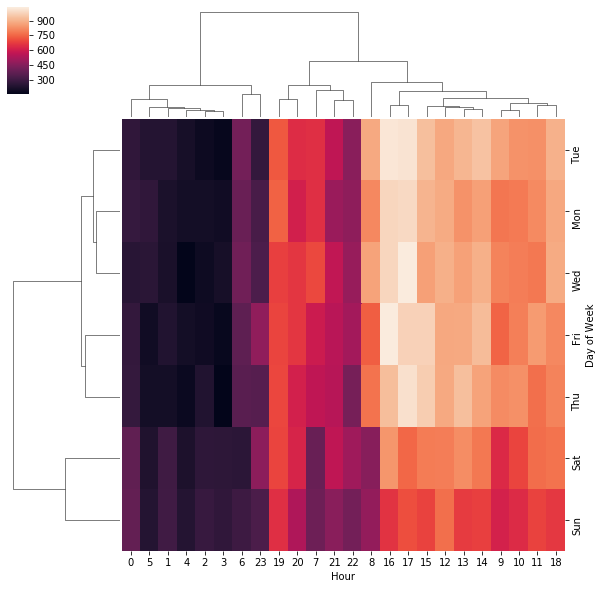

In [46]:
sns.clustermap(dayHour)